In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('GOOG.csv')
data = df['Close'].values.reshape(-1, 1)  
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [6]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [7]:
sequence_length = 20
X, y = create_sequences(scaled_data, sequence_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [8]:
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

C:\Users\omkar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0133 - val_loss: 0.0047
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.6889e-04 - val_loss: 0.0015
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.9477e-04 - val_loss: 0.0019
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.7125e-04 - val_loss: 7.2628e-04
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.2935e-04 - val_loss: 4.5470e-04
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.4737e-04 - val_loss: 4.8232e-04
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.8864e-04 - val_loss: 0.0012
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.0200e-04 - val_loss: 5.6487e-04
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.8441e-04 - val_loss: 4.3616e-04
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7960e-04 - val_loss: 4.8266e-04
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9700e-04 - val_loss:

In [10]:
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2282e-04
Test Loss: 0.000202069481019862
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


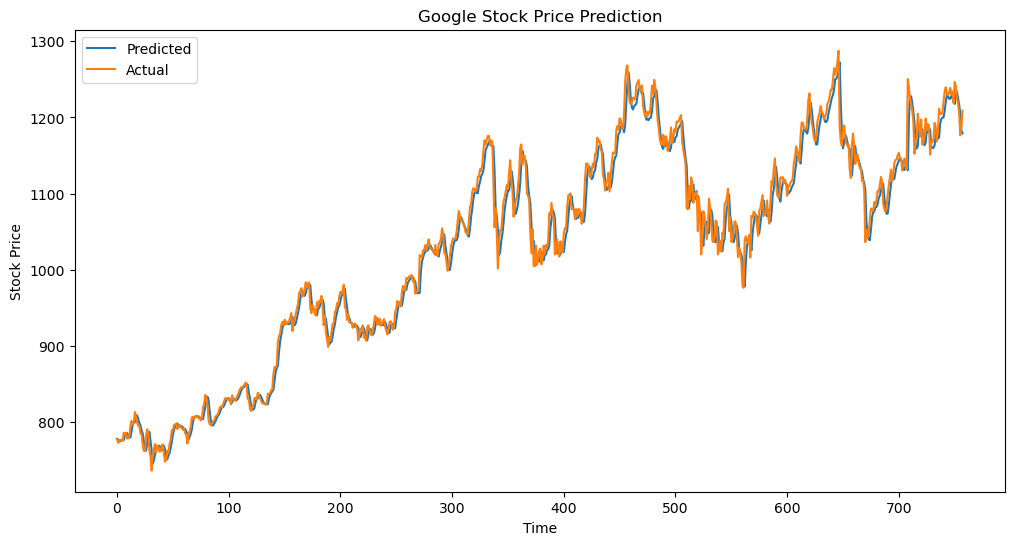

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()